In [18]:
%matplotlib notebook
import os
import time
import numpy as np
import csv
import pandas as pd
import copy
from sklearn.cluster import KMeans

from tqdm import tqdm
import time
import math

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from load_from_coords_1 import align_if_not_aligned_yet
from classes.Settings import Settings
from calc_avg_fragment_2 import read_results_alignment, make_avg_fragment_if_not_exists
from plot_contact_atoms_3 import make_coordinate_df
from calc_density_4 import count_points_per_square

from helpers.plot_functions import plot_density, plot_fragment_colored, plot_vdw_spheres
from helpers.density_helpers import prepare_df, find_available_volume
from helpers.geometry_helpers import (make_coordinate_df,
                                      get_vdw_distance_contact)


central_groups = ["RCOMe", "H2O", "ArCI", "NO3", "RC6F5"] #,
contact_groups = ["CF", "RCN", "R2CO", "XH", "CCH3", "C2CH2", "RC6H5", "ArCH"] #  

# central_groups = ["NO3"]
# contact_groups = ["CF", "RCN"]

to_count =       ["F",   "N",    "O",   "H",   "H",     "H", "centroid", "H"]
resolutions = np.arange(0.1, 1.1, 0.1)

In [19]:
def plot_contour_level(ax, df, settings, level):
    if level == 25:
        color = "red"
    elif level == 50:
        color = "green"
    elif level == 75:
        color = "blue"
    
    ax.scatter(list(df.xmiddle), list(df.ymiddle), list(df.zmiddle), c=color, s=2)

    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')

    return ax

<IPython.core.display.Javascript object>


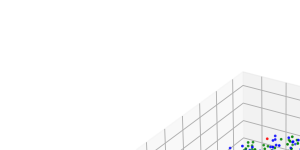

<IPython.core.display.Javascript object>


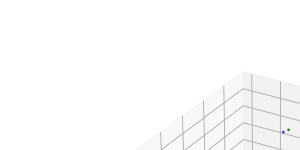

<IPython.core.display.Javascript object>


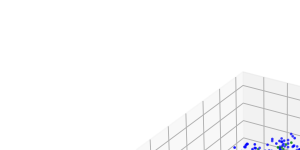

<IPython.core.display.Javascript object>


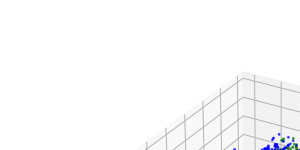

<IPython.core.display.Javascript object>


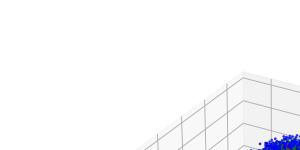

<IPython.core.display.Javascript object>


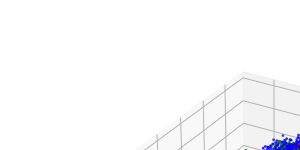

<IPython.core.display.Javascript object>


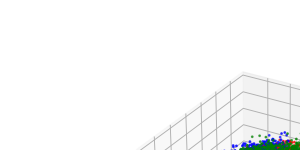

<IPython.core.display.Javascript object>


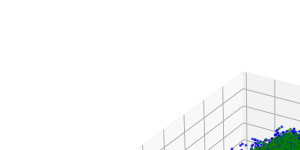

<IPython.core.display.Javascript object>


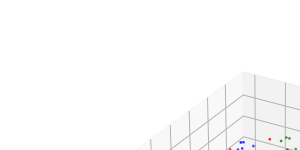

<IPython.core.display.Javascript object>


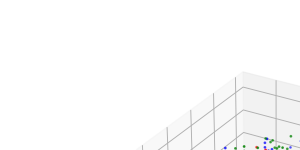

<IPython.core.display.Javascript object>


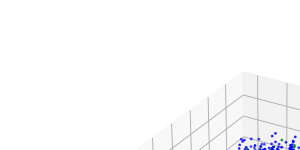

<IPython.core.display.Javascript object>


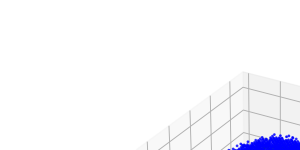

<IPython.core.display.Javascript object>


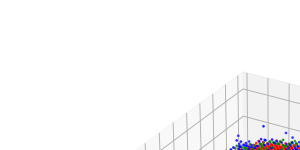

<IPython.core.display.Javascript object>


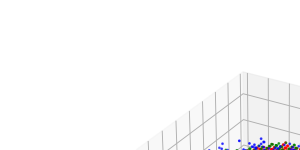

<IPython.core.display.Javascript object>


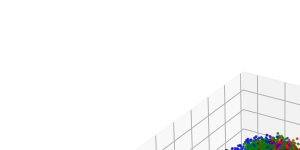

<IPython.core.display.Javascript object>


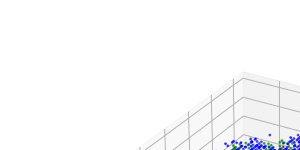

<IPython.core.display.Javascript object>


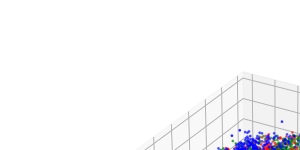

<IPython.core.display.Javascript object>


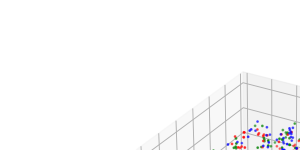

<IPython.core.display.Javascript object>


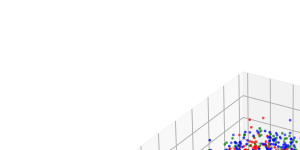

<IPython.core.display.Javascript object>


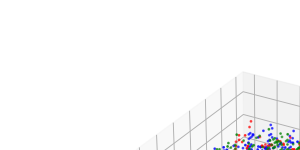

<IPython.core.display.Javascript object>


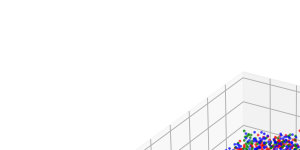

<IPython.core.display.Javascript object>


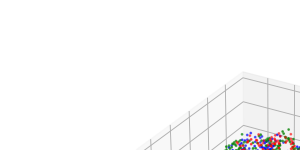

<IPython.core.display.Javascript object>


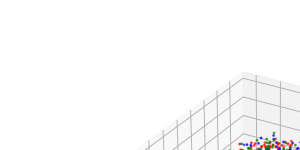

<IPython.core.display.Javascript object>


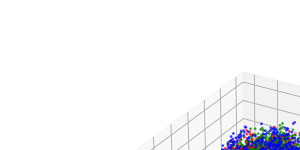

<IPython.core.display.Javascript object>


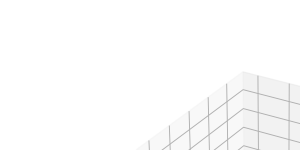

<IPython.core.display.Javascript object>


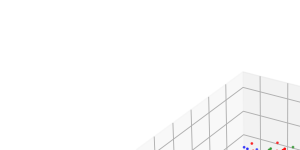

<IPython.core.display.Javascript object>


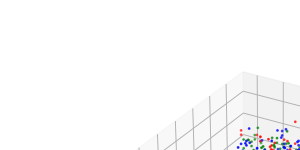

<IPython.core.display.Javascript object>


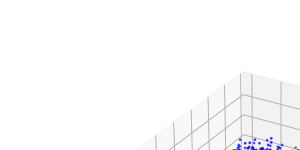

<IPython.core.display.Javascript object>


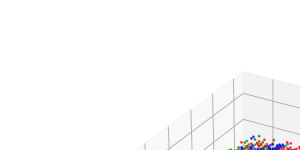

<IPython.core.display.Javascript object>


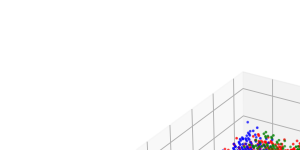

<IPython.core.display.Javascript object>


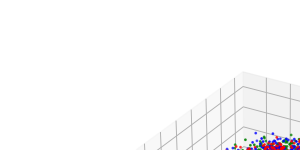

<IPython.core.display.Javascript object>


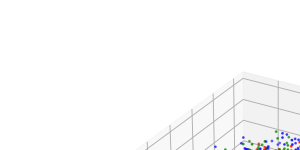

<IPython.core.display.Javascript object>


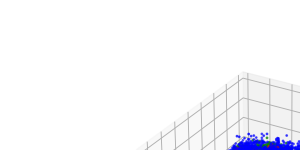

<IPython.core.display.Javascript object>


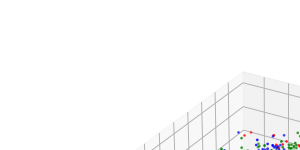

<IPython.core.display.Javascript object>


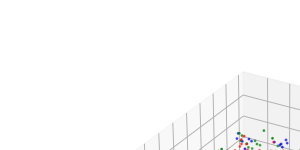

<IPython.core.display.Javascript object>


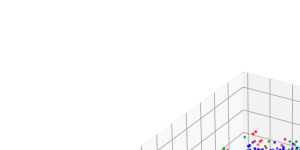

<IPython.core.display.Javascript object>


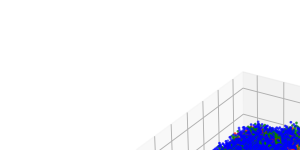

<IPython.core.display.Javascript object>


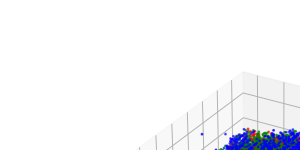

<IPython.core.display.Javascript object>


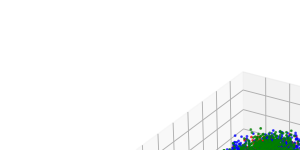

<IPython.core.display.Javascript object>


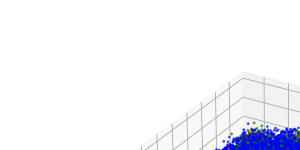

In [26]:
for central in central_groups:
    for contact, to_count_contact in zip(contact_groups, to_count):       
        filename = ".\\results\\" + central + "\\" + central + "_" + contact + "_vdw.5" + "\\" + central + "_" + contact + "_vdw.5_aligned.csv"
        settings = Settings(filename)
        settings.set_atom_to_count(to_count_contact)
        settings.set_resolution(round(0.2, 2))
        
        df = read_results_alignment(settings.get_aligned_csv_filename())      
        avg_fragment = make_avg_fragment_if_not_exists(settings, df)
        
        density_df = pd.read_hdf(settings.get_density_df_filename(), settings.get_density_df_key())
        
        density_df = density_df.sort_values(by=[to_count_contact], ascending=False)
        
        density_df['ymiddle'] = (density_df['ystart'] * 2 + settings.resolution) / 2
        density_df['xmiddle'] = (density_df['xstart'] * 2 + settings.resolution) / 2
        density_df['zmiddle'] = (density_df['zstart'] * 2 + settings.resolution) / 2

        density_df = density_df[density_df[to_count_contact] > 0]
        
        amount_rows = len(density_df)
        percent_25 = math.ceil(amount_rows / 4)
        percent_50 = math.ceil(amount_rows / 2)
        percent_75 = math.ceil(amount_rows / 4) * 3
       
        
        fig = plt.figure()
        ax: Axes3D = fig.add_subplot(111, projection='3d')
            
        ax = plot_fragment_colored(ax, avg_fragment)
        
        ax = plot_contour_level(ax, density_df[0:percent_25], settings, 25)
        ax = plot_contour_level(ax, density_df[percent_25:percent_50], settings, 50)
        ax = plot_contour_level(ax, density_df[percent_50:percent_75], settings, 75)
        
        plt.show()
        plt.savefig('directionality_tests/' + central + "/" + central + "_" + contact + "_IsoStar_alldata_resolution" + str(settings.resolution) + ".png")

<IPython.core.display.Javascript object>


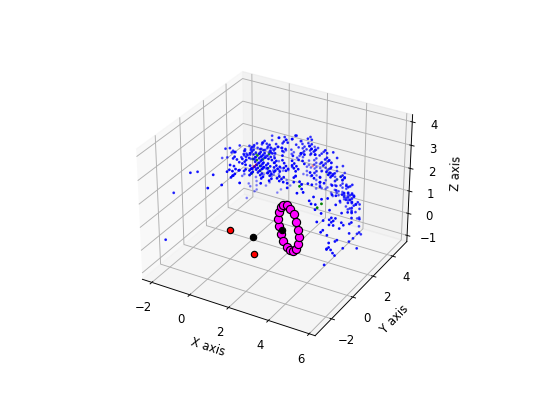

<IPython.core.display.Javascript object>


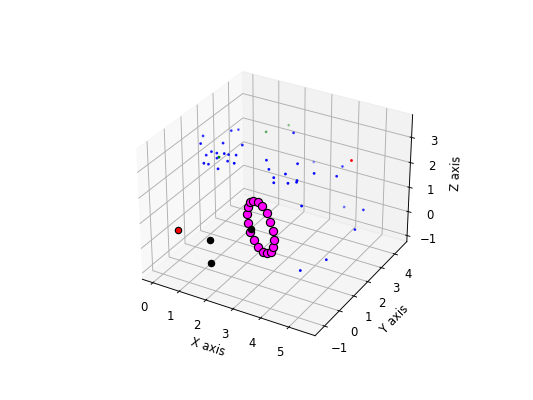

<IPython.core.display.Javascript object>


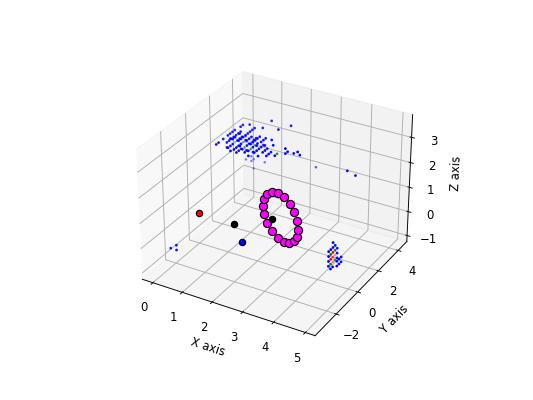

<IPython.core.display.Javascript object>


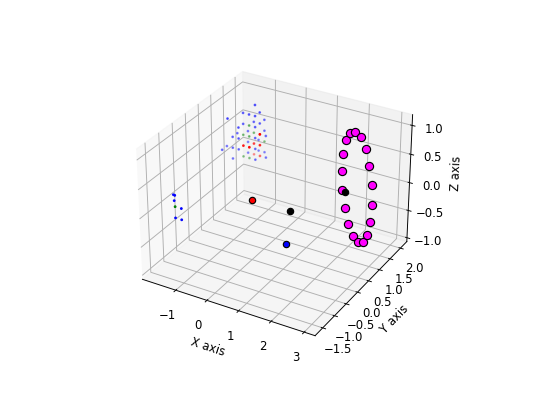

<IPython.core.display.Javascript object>


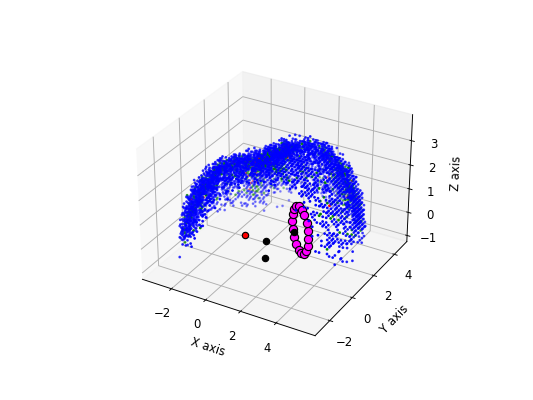

<IPython.core.display.Javascript object>


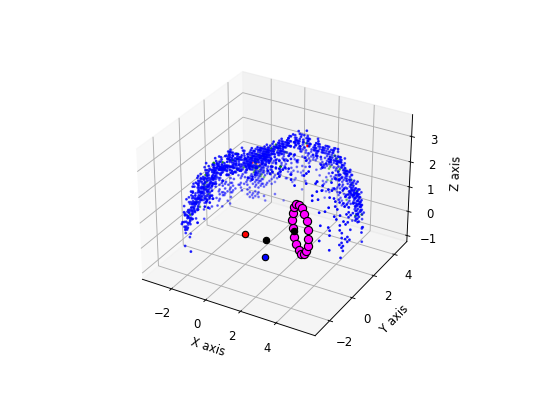

<IPython.core.display.Javascript object>


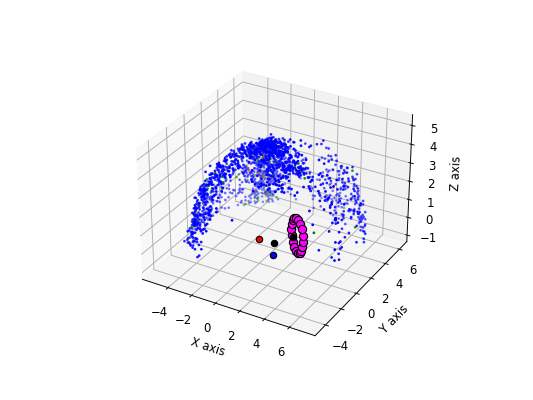

<IPython.core.display.Javascript object>


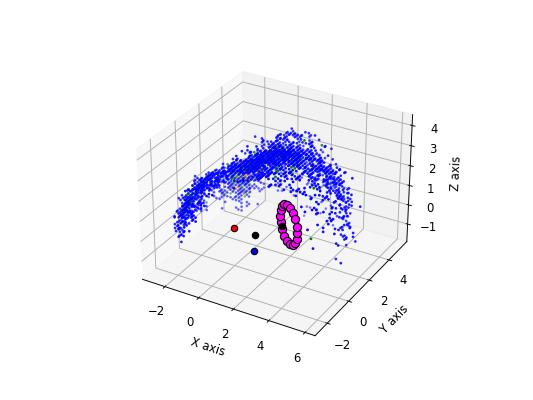

<IPython.core.display.Javascript object>


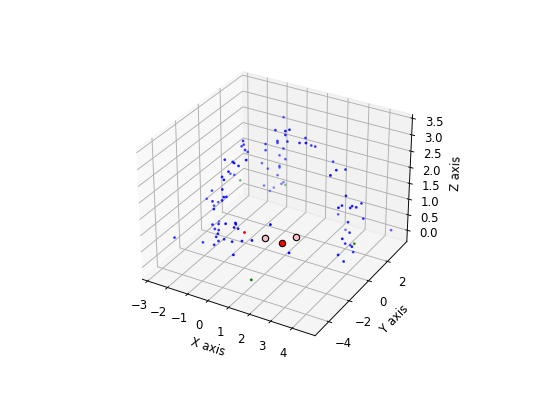

<IPython.core.display.Javascript object>


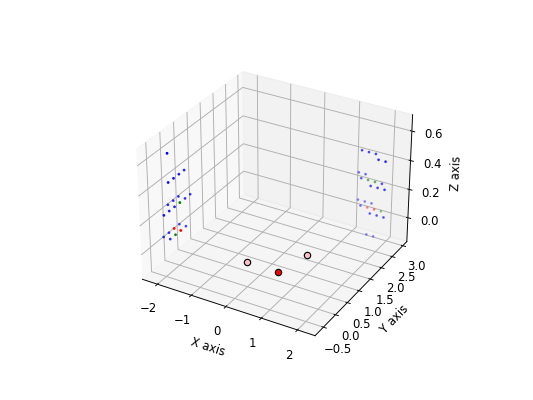

<IPython.core.display.Javascript object>


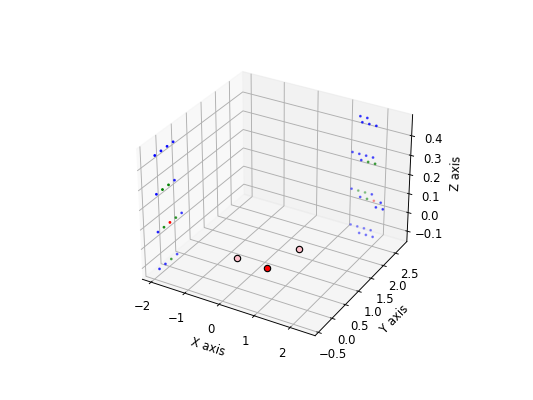

c:\users\natas\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


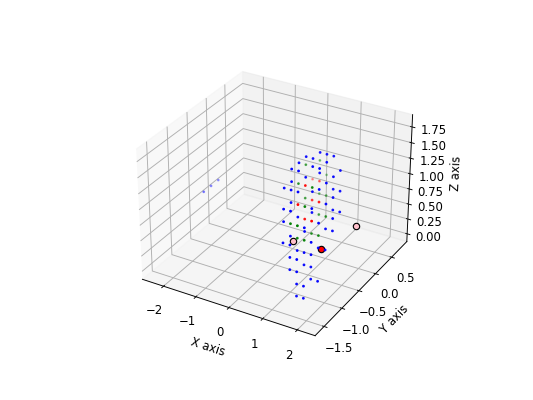

<IPython.core.display.Javascript object>


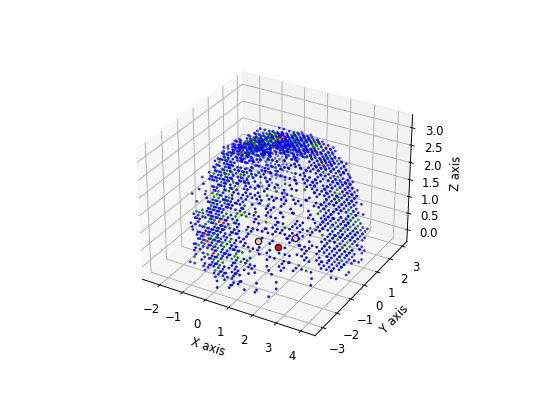

<IPython.core.display.Javascript object>


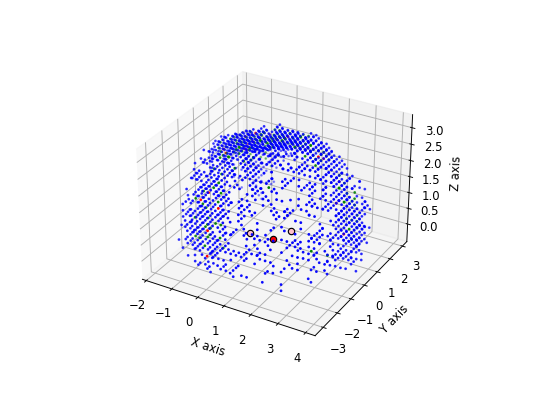

<IPython.core.display.Javascript object>


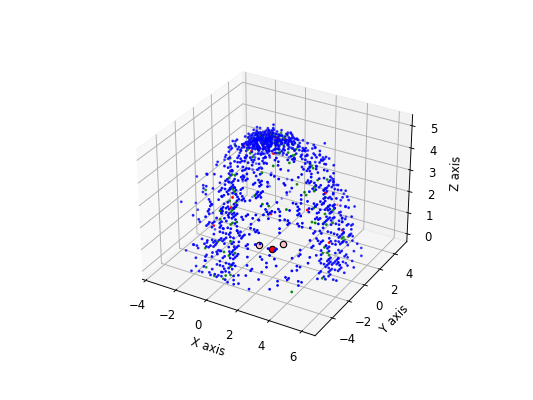

<IPython.core.display.Javascript object>


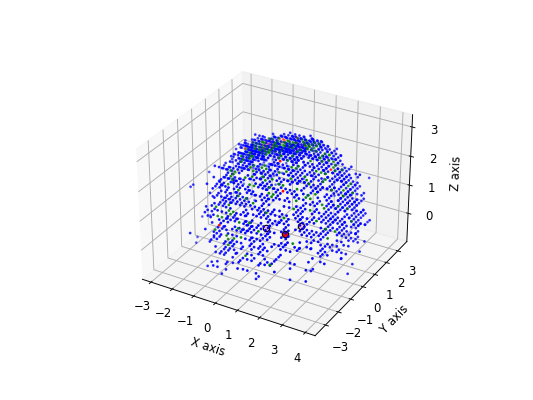

<IPython.core.display.Javascript object>


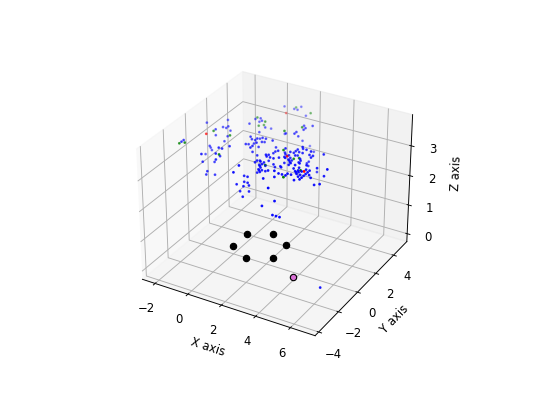

<IPython.core.display.Javascript object>


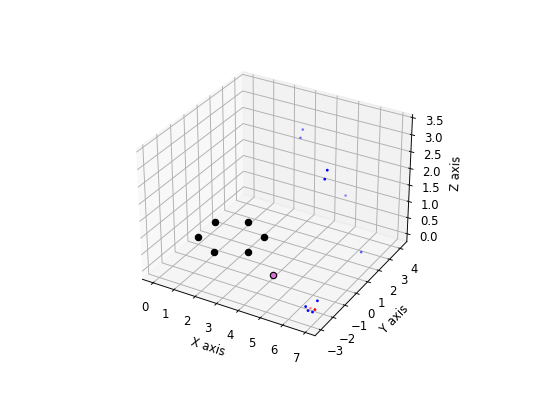

<IPython.core.display.Javascript object>


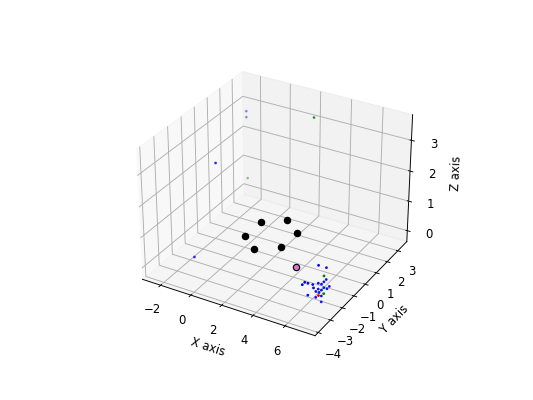

<IPython.core.display.Javascript object>


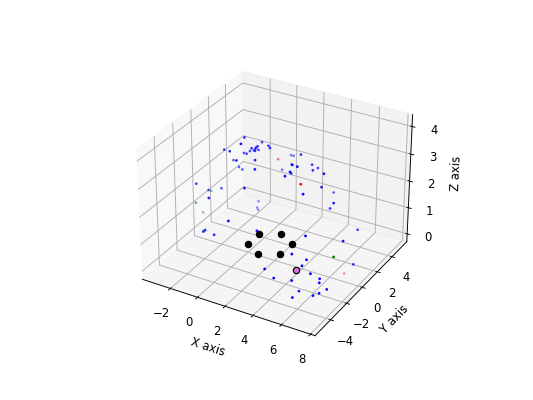

<IPython.core.display.Javascript object>


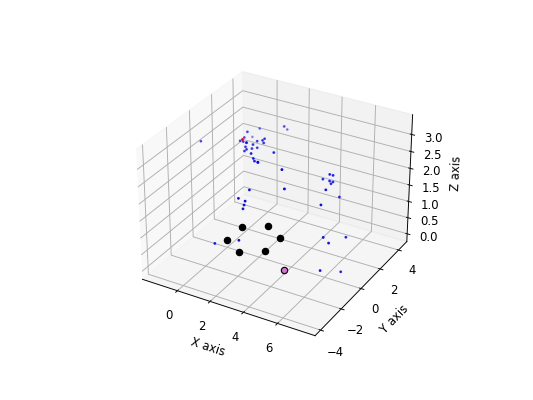

<IPython.core.display.Javascript object>


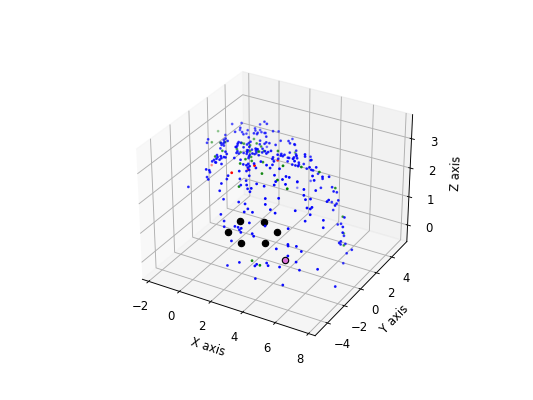

<IPython.core.display.Javascript object>


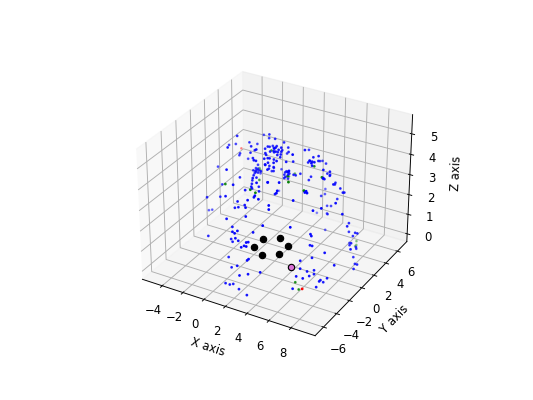

<IPython.core.display.Javascript object>


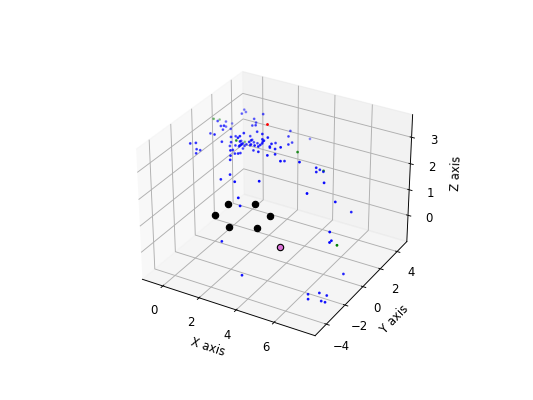

<IPython.core.display.Javascript object>


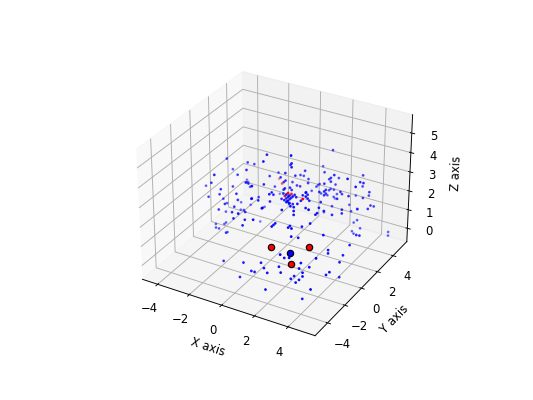

<IPython.core.display.Javascript object>


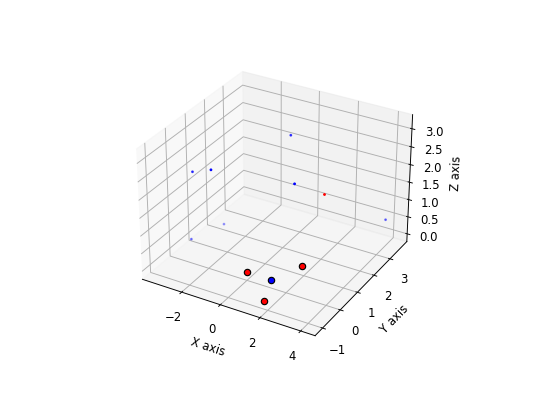

<IPython.core.display.Javascript object>


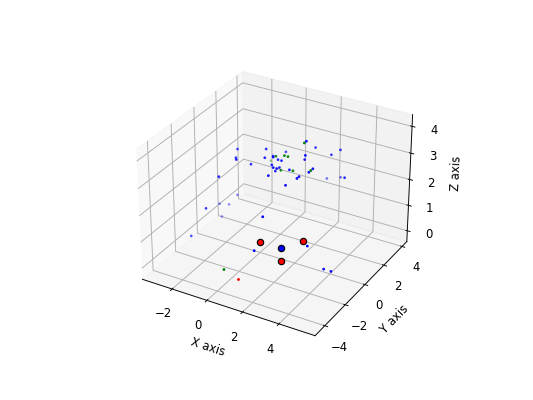

<IPython.core.display.Javascript object>


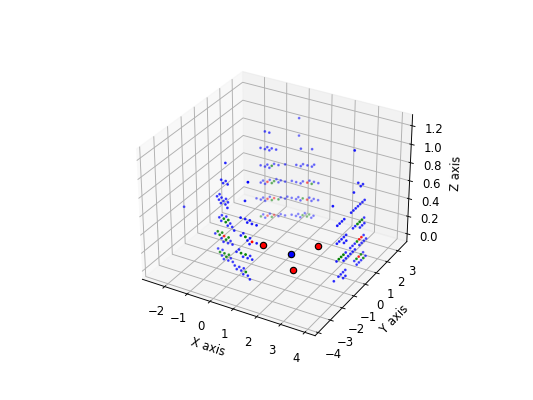

<IPython.core.display.Javascript object>


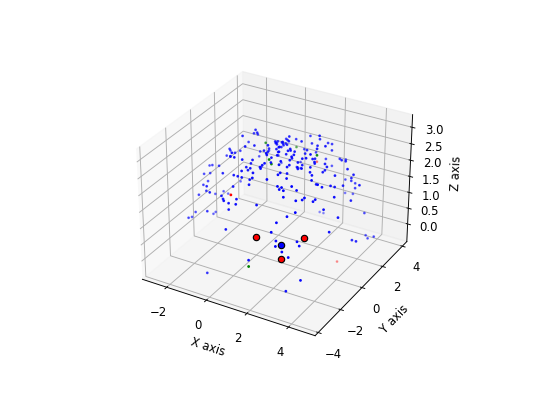

<IPython.core.display.Javascript object>


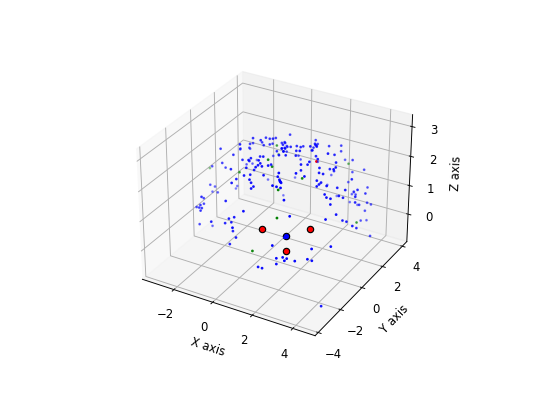

<IPython.core.display.Javascript object>


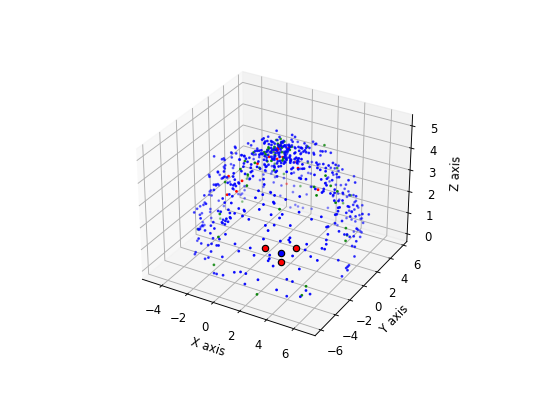

<IPython.core.display.Javascript object>


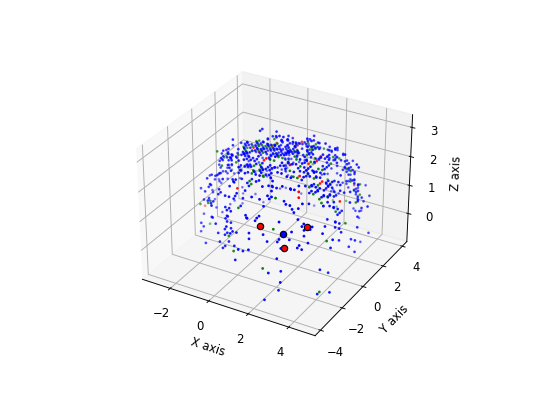

<IPython.core.display.Javascript object>


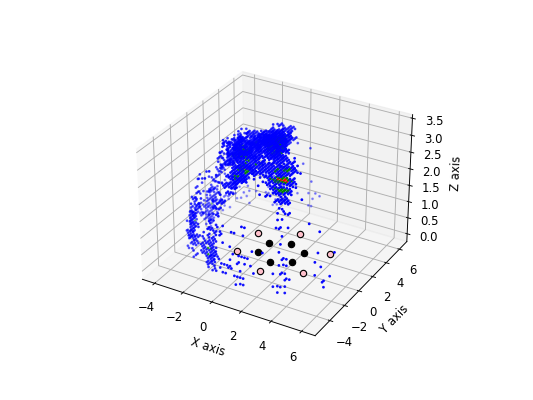

<IPython.core.display.Javascript object>


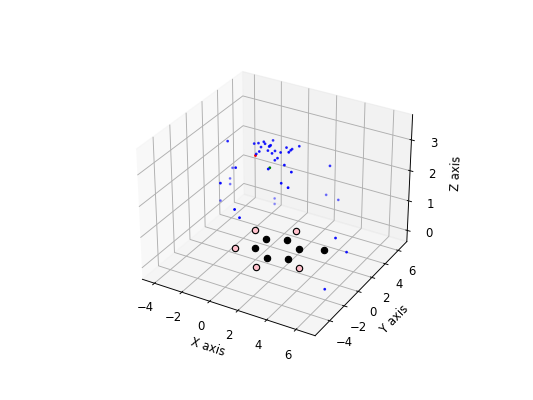

<IPython.core.display.Javascript object>


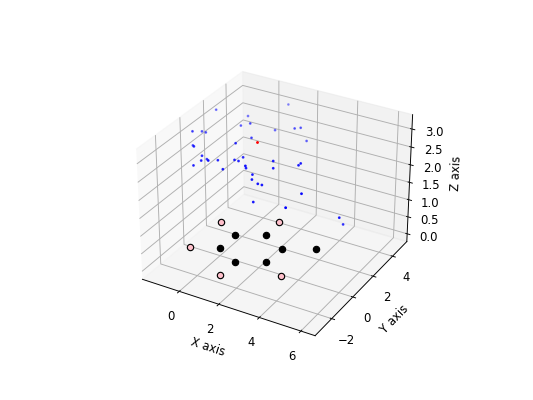

<IPython.core.display.Javascript object>


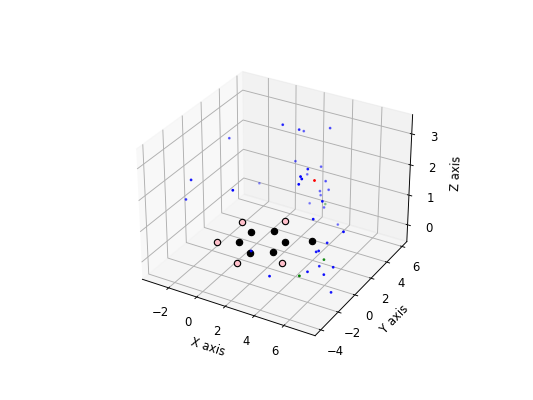

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


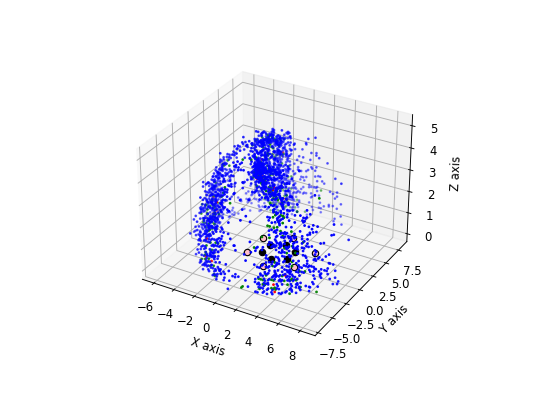

<IPython.core.display.Javascript object>


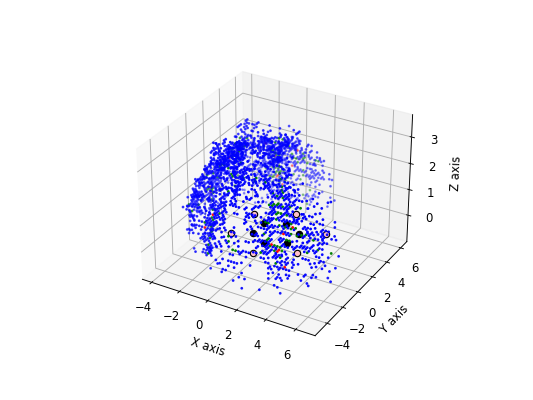

In [24]:
for central in central_groups:
    for contact, to_count_contact in zip(contact_groups, to_count):      
        filename = ".\\results\\" + central + "\\" + central + "_" + contact + "_vdw.5" + "\\" + central + "_" + contact + "_vdw.5_aligned.csv"
        settings = Settings(filename)
        settings.set_atom_to_count(to_count_contact)
        settings.set_resolution(round(0.2, 2))
        
        df = read_results_alignment(settings.get_aligned_csv_filename())      
        avg_fragment = make_avg_fragment_if_not_exists(settings, df)
        
        density_df = pd.read_hdf(settings.get_density_df_filename(), settings.get_density_df_key())
        
        density_df = density_df.sort_values(by=[to_count_contact], ascending=False)
        
        density_df['ymiddle'] = (density_df['ystart'] * 2 + settings.resolution) / 2
        density_df['xmiddle'] = (density_df['xstart'] * 2 + settings.resolution) / 2
        density_df['zmiddle'] = (density_df['zstart'] * 2 + settings.resolution) / 2      
        
        fig = plt.figure()
        ax: Axes3D = fig.add_subplot(111, projection='3d')
        ax = plot_fragment_colored(ax, avg_fragment)
            
        max_bin = density_df[to_count_contact].max()
        percent_25 = 0.25 * max_bin
        percent_50 = 0.50 * max_bin
        percent_75 = 0.75 * max_bin
        
        ax = plot_contour_level(ax, density_df[density_df[to_count_contact] > percent_75], settings, 25)
        ax = plot_contour_level(ax, density_df[(density_df[to_count_contact] <= percent_75) & (density_df[to_count_contact] > percent_50)], settings, 50)
        ax = plot_contour_level(ax, density_df[(density_df[to_count_contact] <= percent_50) & (density_df[to_count_contact] > percent_25)], settings, 75)
        
        plt.show()
        plt.savefig('directionality_tests/' + central + "/" + central + "_" + contact + "_IsoStar_resolution" + str(settings.resolution) + ".png")